<a href="https://colab.research.google.com/github/KJOELJOYSON2427/NLP_SENTIMENTAL_ANALYSIS/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer,ToktokTokenizer
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer
import os
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
!pip install scikit-plot

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer,ToktokTokenizer
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem import WordNetLemmatizer
import os
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [10]:
df=pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")


In [11]:
df.head(2)

Unnamed: 0  Clothing ID  Age Title  \
0           0          767   33   NaN   
1           1         1080   34   NaN   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4       General         Dresses    Dresses

In [12]:
df =df[['Review Text','Recommended IND']]
df

Review Text  Recommended IND
0      Absolutely wonderful - silky and sexy and comf...                1
1      Love this dress!  it's sooo pretty.  i happene...                1
2      I had such high hopes for this dress and reall...                0
3      I love, love, love this jumpsuit. it's fun, fl...                1
4      This shirt is very flattering to all due to th...                1
...                                                  ...              ...
23481  I was very happy to snag this dress at such a ...                1
23482  It reminds me of maternity clothes. soft, stre...                1
23483  This fit well, but the top was very see throug...                0
23484  I bought this dress for a wedding i have this ...                1
23485  This dress in a lovely platinum is feminine an...                1

[23486 rows x 2 columns]

In [13]:
#Get Dimension of the Data
df.shape

(23486, 2)

In [15]:
df.rename(columns={
    'Review Text':'review_text','Recommended IND':'recommended'
}, inplace=True)

In [16]:
df.head(2)

review_text  recommended
0  Absolutely wonderful - silky and sexy and comf...            1
1  Love this dress!  it's sooo pretty.  i happene...            1

In [17]:
#Checking and Handling Missing Values
df.isna().sum()

review_text    845
recommended      0
dtype: int64

In [18]:
df['review_text']= df['review_text'].fillna(' ')

In [19]:
df.isna().sum()

review_text    0
recommended    0
dtype: int64

In [20]:
df.dtypes

review_text    object
recommended     int64
dtype: object

In [21]:
#Exploratory Data Analysis (EDA)
df.loc[df["recommended"] == 0, "recommended"]= "Not Recommended" # 0 -> Not Recommended
df.loc[df["recommended"] == 1, "recommended"] = "Recommended" # 1 -> Recommended

/tmp/ipython-input-4194032853.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Recommended' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["recommended"] == 0, "recommended"]= "Not Recommended" # 0 -> Not Recommended


In [22]:
df.dtypes

review_text    object
recommended    object
dtype: object

In [23]:
#Check Proportion Target Class Variable
count_class = df.value_counts(df["recommended"],sort=True)

In [24]:
count_class

recommended
Recommended        19314
Not Recommended     4172
Name: count, dtype: int64

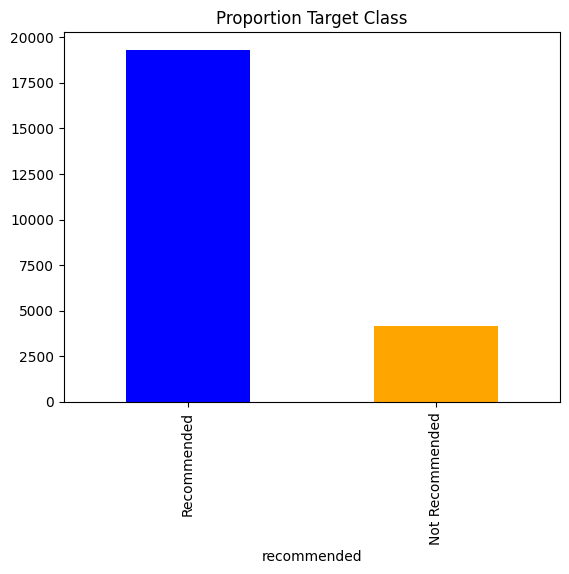

In [25]:
count_class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Proportion Target Class')
plt.show()

In [26]:
print('Recommended', round(df['recommended'].value_counts()['Recommended']/df.shape[0]*100), '%')

Recommended 82 %


In [27]:
print('Not Recommended', round(df['recommended'].value_counts()['Not Recommended']/df.shape[0]*100), '%')

Not Recommended 18 %


In [28]:
#Check Most Common Words in Each Target Variable Values
count1 =Counter(" ".join(df[df['recommended']=="Recommended"]['review_text']).\
                split()).most_common(20)

In [29]:
count1

[('the', 58954),
 ('i', 40789),
 ('and', 40389),
 ('a', 35828),
 ('it', 29788),
 ('is', 25523),
 ('to', 19767),
 ('this', 16676),
 ('in', 16506),
 ('but', 12601),
 ('for', 11337),
 ('with', 11250),
 ('on', 10795),
 ('of', 10512),
 ('so', 9453),
 ('my', 9024),
 ('was', 7955),
 ('that', 7462),
 ('I', 6964),
 ('not', 6944)]

In [30]:
df1 = pd.DataFrame.from_dict(count1)
df1

0      1
0    the  58954
1      i  40789
2    and  40389
3      a  35828
4     it  29788
5     is  25523
6     to  19767
7   this  16676
8     in  16506
9    but  12601
10   for  11337
11  with  11250
12    on  10795
13    of  10512
14    so   9453
15    my   9024
16   was   7955
17  that   7462
18     I   6964
19   not   6944

In [31]:
df1=df1.rename(columns={
    0:"commom_words", 1:"cout"
})
df1.head(10)

commom_words   cout
0          the  58954
1            i  40789
2          and  40389
3            a  35828
4           it  29788
5           is  25523
6           to  19767
7         this  16676
8           in  16506
9          but  12601

In [32]:
count2 = Counter(" ".join(df[df['recommended']== 'Not Recommended']['review_text']).\
                 split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)

In [33]:
df2 = df2.rename(columns={0: "common_words", 1 : "count"})
df2.head(10)

common_words  count
0          the  15744
1            i   8841
2          and   8116
3           it   7514
4            a   6804
5           is   4799
6           to   4547
7          was   4137
8         this   4050
9           in   3705

In [34]:
df.iloc[1,0]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

Text Mining

In [37]:
tokenizer =ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english'
)
stopword_list

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
main_text = df['review_text']
target = df['recommended']

print(len(main_text))
print(len(target))

23486
23486


In [40]:
contractions_dict = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
                           "how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
                           "they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
                           "they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have"
}


In [41]:

def expand_match(contraction):
    match =contraction.group(0)
    expanded_contraction= contractions_dict.get(match.lower())
    print(expanded_contraction)
    return expanded_contraction


def expand_contractions(text, contractions_dict):
  contraction_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                   flags=re.IGNORECASE | re.DOTALL)
  expanded_text = contraction_pattern.sub(expand_match, text)
  expanded_text= re.sub("'", "", expanded_text)
  return expanded_text



In [42]:
def cons(text):
  text=expand_contractions(text,contractions_dict)
  return text
main_text=main_text.apply(cons)

Streaming output truncated to the last 5000 lines.
None
did not
does not
None
it is
were not
None
might not
it is
None
None
it is
it is
None
it is
does not
None
None
it is
None
it is
None
that had
does not
it is
could not
did not
None
None
did not
did not
None
None
it is
do not
None
did not
do not
it is
does not
None
it is
None
it is
does not
it is
it is
does not
None
it is
None
None
it is
did not
None
have not
None
None
did not
None
could not
did not
did not
is not
it is
it is
did not
it is
None
should not
None
None
there is
cannot
None
it is
it is
it is
None
that is
was not
None
None
it is
it is
None
does not
it will
None
it is
None
None
None
None
it is
that is
did not
cannot
None
None
None
did not
it is
do not
do not
was not
it is
it is
it is
None
do not
do not
does not
were not
does not
None
cannot
None
it is
None
None
that is
was not
None
None
None
None
it is
does not
did not
they are
did not
do not
was not
cannot
it is
it is
should have
was not
None
None
None
it is
None
it is
did

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it is sooo pretty.  i happen...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it is fun, f...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review_text, Length: 23486, dtype: object

In [44]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [51]:
def to_lower(text):

  return ' '.join([(w.lower()) for w in word_tokenize(text)])
main_text = main_text.apply(to_lower)



Streaming output truncated to the last 5000 lines.
i just had to try it on because it was so soft ! and i have never felt so comfortable and so sexy at the same time in a dress ! i am 5 ' 4 170lbs and 36ddd and the large fit well . i only with the slit came up higher . that might be an issue just because of my height though . loved it , waiting for a good sale ! !
this dress is so soft ! the dress hangs really well across the front and hides your stomach area a bit . you can wear a regular bra with this dress as well . the downside to this dress is that is shows the slightest liquid and stains very easily . wore this on a hot day and the slightest sweat showed . in addition , the front drape across the chest can gape open and show your bra . overall , i really love the fit of this dress .
the fit on this jean is amazing , they just run large , and then they also stretch quite a bit after 1-2 wears . i am usually a solid size 30 ( and have other pairs of dl1961s ) but i am buying in a 2

KeyboardInterrupt: 

Remove Special Character and Punctuation

Removing all special character like .?/@# etc


In [58]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def strip_punctuation(s):
  return ''.join(c for c in s if c not in punctuation)
main_text = main_text.apply(remove_special_characters)
main_text = main_text.apply(strip_punctuation)


In [60]:
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
def replaceElongated(word):
  repeat_regexp =re.compile(r'(\w*)(\w)\2(\w*)')
  repl = r'\1\2\3'
  if wordnet.synsets(word):
        return word
  repl_word = repeat_regexp.sub(repl, word)
  if repl_word !=word:
    return replaceElongated(repl_word)
  else:
    return repl_word
main_text = main_text.apply(replaceElongated)
print(main_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


0        absolutely wonderful  silky and sexy and comfo...
1        love this dres  it s so prety  i hapened to fi...
2        i had such high hopes for this dres and realy ...
3        i love  love  love this jumpsuit  it s fun  fl...
4        this shirt is very flatering to al due to the ...
                               ...                        
23481    i was very hapy to snag this dres at such a gr...
23482    it reminds me of maternity clothes  soft  stre...
23483    this fit wel  but the top was very se through ...
23484    i bought this dres for a weding i have this su...
23485    this dres in a lovely platinum is feminine and...
Name: review_text, Length: 23486, dtype: object


Tokenization

Tokenization is splitting sentences into smaller unit, such as terms or word.

In [61]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
main_text = main_text.apply(lambda x: tokenizer.tokenize(x))
main_text.sample(5)

9872     [this, romper, is, fabulous, i, bought, it, in...
22969    [this, is, a, beautiful, knit, dres, however, ...
10892    [i, bought, in, white, great, for, a, lightwei...
20414    [i, bought, this, sweater, the, minute, i, saw...
8488     [purchased, the, xs, blue, love, the, fit, and...
Name: review_text, dtype: object

Removing Stopwords

Remove stopwords like "is, the, with, etc" since they don't have usefull information

In [62]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopword_list]
    return words

main_text = main_text.apply(lambda x : remove_stopwords(x))
main_text

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dres, prety, hapened, find, store, glad...
2        [high, hopes, dres, realy, wanted, work, initi...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flatering, al, due, adjustable, front,...
                               ...                        
23481    [hapy, snag, dres, great, price, easy, slip, f...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, wel, top, se, never, would, worked, glad...
23484    [bought, dres, weding, sumer, cute, unfortunat...
23485    [dres, lovely, platinum, feminine, fits, perfe...
Name: review_text, Length: 23486, dtype: object

Stemming

Stemming is the process of reducing a word to its word stem. For example "Consulting" to be "consult"

In [63]:
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")

In [64]:
from pdb import main
def stem_update(text_list):
  text_list_new =[]
  for word in text_list:
    word = snowball_stemmer.stem(word)
    text_list_new.append(word)
  return text_list_new
main_text= main_text.apply(stem_update)

main_text

0                  [absolut, wonder, silki, sexi, comfort]
1        [love, dres, preti, hapen, find, store, glad, ...
2        [high, hope, dres, reali, want, work, initiali...
3        [love, love, love, jumpsuit, fun, flirti, fabu...
4        [shirt, flater, al, due, adjust, front, tie, p...
                               ...                        
23481    [hapi, snag, dres, great, price, easi, slip, f...
23482    [remind, matern, cloth, soft, stretchi, shini,...
23483    [fit, wel, top, se, never, would, work, glad, ...
23484    [bought, dres, wede, sumer, cute, unfortun, fi...
23485    [dres, love, platinum, feminin, fit, perfect, ...
Name: review_text, Length: 23486, dtype: object

Drop Numbers

Remove numbers from text, since numbers doesn't give much importance to get the main words.

In [65]:
def drop_numbers(list_text):
  list_text_new = []
  for i in list_text:
    if not re.search('/d', i):
      list_text_new.append(i)
  return ' '.join(list_text_new)
main_text = main_text.apply(drop_numbers)
main_text

0                        absolut wonder silki sexi comfort
1        love dres preti hapen find store glad bc never...
2        high hope dres reali want work initiali order ...
3        love love love jumpsuit fun flirti fabul everi...
4        shirt flater al due adjust front tie perfect l...
                               ...                        
23481    hapi snag dres great price easi slip flater cu...
23482    remind matern cloth soft stretchi shini materi...
23483    fit wel top se never would work glad abl tri s...
23484    bought dres wede sumer cute unfortun fit nt pe...
23485    dres love platinum feminin fit perfect easi we...
Name: review_text, Length: 23486, dtype: object

In [66]:
df = pd.concat([main_text,target], axis=1)

In [67]:
df.head(2)

review_text  recommended
0                  absolut wonder silki sexi comfort  Recommended
1  love dres preti hapen find store glad bc never...  Recommended

Most Common Words in Recommended Review

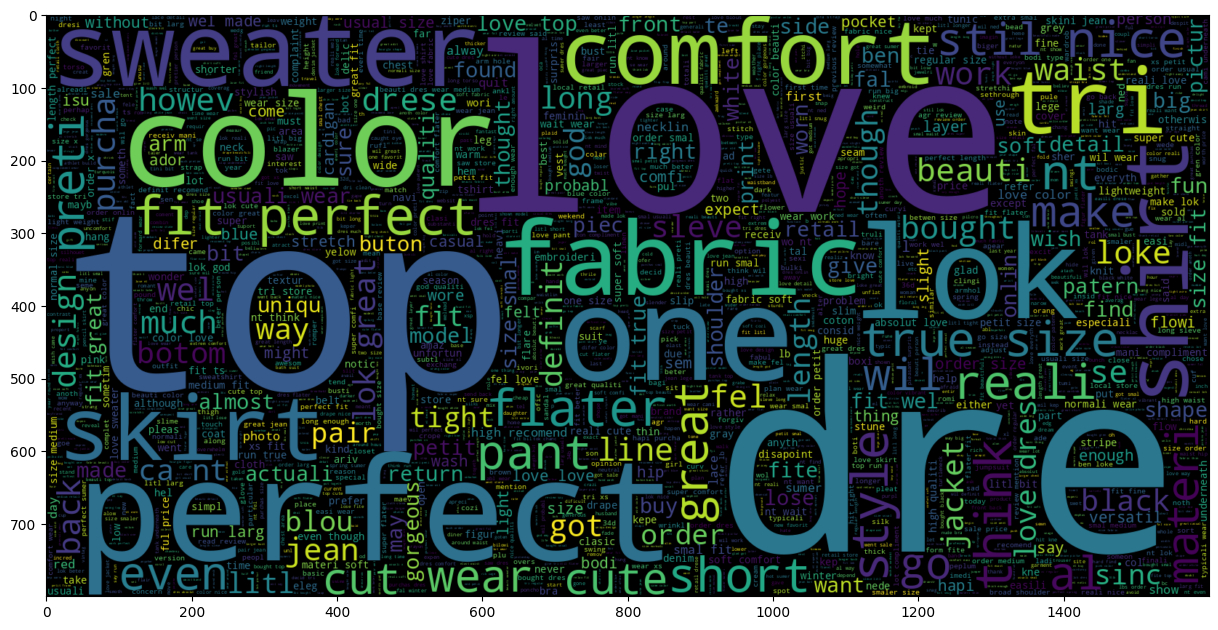

In [71]:
plt.figure(figsize = (15,15)) # Text that is recommended
wc=WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.recommended == 'Recommended'].review_text))
plt.imshow(wc, interpolation ="bilinear")


Most Common Words in Not Recommended Review

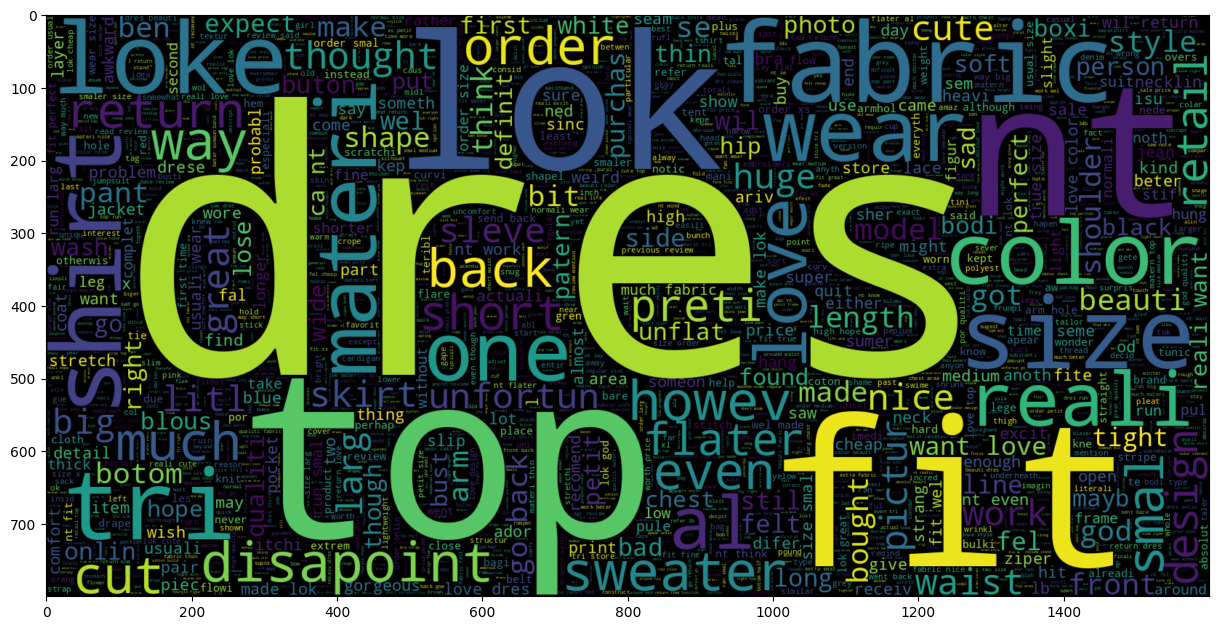

In [72]:
plt.figure(figsize = (15,15)) # Text that is not recommended
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.recommended == 'Not Recommended'].review_text))
plt.imshow(wc , interpolation = 'bilinear')

Modelling using Multinomial Naive Bayes

Split the data and count the vectorize in each words

The next step is to create a numerical feature vector for each document and split them into train data and test data.

In [76]:
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
cv=CountVectorizer()

X_train = cv.fit_transform(train_data['review_text'])
y_train = train_data['recommended']
X_test = cv.transform(test_data['review_text'])
y_test = test_data['recommended']

print(X_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Multinomial Naive Bayes Modelling

In [78]:
nb= MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [79]:
nb_predict=nb.predict(X_test)

# Matrix Evaluation

After we get the result from our modelling, the next step is evaluate our model using matrix evaluation as follows:

Where :
TP (True Positive) : Predicted positive and the actual's positive
TN (True Negative) : Predicted negative and the actual's negative
FP (False Positive) : Predicted positive but the actual's negative
FN (False Negative) : Predicted negative but the actual's positive

In [80]:
nb_report = accuracy_score(y_test,nb_predict)
print('Accuracy:',nb_report)

Accuracy: 0.8891017454235846


In [84]:
nb_report1 = recall_score(y_test,nb_predict,pos_label='Recommended',average='binary')
print('Recall:',nb_report1)

Recall: 0.9472868217054263


In [85]:
nb_report2 = precision_score(y_test,nb_predict,pos_label='Recommended',average='binary')
print('Precision:',nb_report2)

Precision: 0.9204117499372333
